In [1]:
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data into a dataframe
data = np.load('polution_dataSet.npy')

In [3]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 1      # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 7000
VAL_SIZE = 1000
TEST_SIZE = 2000
TIMESTEPS = 24           # timesteps used for a single prediction (here each timestep is an hour)

In [4]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [6]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE:i*SAMPLE_DISTANCE+TIMESTEPS]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [7]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [8]:
K.clear_session()
# keras modeling
model = Sequential()
model.add(LSTM(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                7840      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 13s 2ms/step - loss: 0.0243 - val_loss: 0.0247
Epoch 2/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0180 - val_loss: 0.0166
Epoch 3/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0162 - val_loss: 0.0149
Epoch 4/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0155 - val_loss: 0.0137
Epoch 5/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0148 - val_loss: 0.0138
Epoch 6/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 7/20
7000/7000 [==============================] - 10s 1ms/step - loss: 0.0149 - val_loss: 0.0137
Epoch 8/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 9/20
7000/7000 [==============================] - 11s 2ms/step - loss: 0.0147 - val_loss: 0.0137
Epoch 10/20
7000/7000 [==

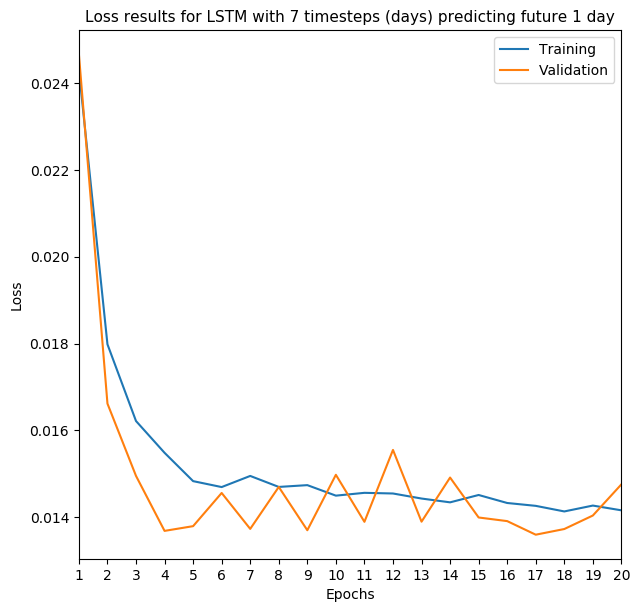

In [11]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for LSTM with 7 timesteps (days) predicting future 1 day', fontsize=11)
plt.legend()
plt.show()

In [12]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.024314825091111873, 0.017982286781604802, 0.016211817131843418, 0.015478704636583903, 0.014825129708541291, 0.014688252659647592, 0.014945065111720137, 0.014691395886974143, 0.014732727828834738, 0.014490276161647801, 0.01455520980791854, 0.014540046988653818, 0.014423640933819116, 0.014335760917913701, 0.014505471831985882, 0.014320835169803883, 0.014254902017169765, 0.01412592623914991, 0.014261460705394191, 0.01415150315899934]
test loss history: [0.02467386910924688, 0.016613645735196768, 0.014945935152936726, 0.013677257426315918, 0.013786446021404117, 0.014552180273458361, 0.013723516865866259, 0.014691049061948434, 0.013692386564798653, 0.014971347620012239, 0.013886393532156944, 0.01554510614834726, 0.013889733070973307, 0.014907737548928707, 0.013986336605157704, 0.01390277108293958, 0.013589306632056833, 0.013720298003754579, 0.014031702395295725, 0.014751037056557835]
2000/2000 [==============================] - 1s 356us/step

Test result loss: 0.014


In [13]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

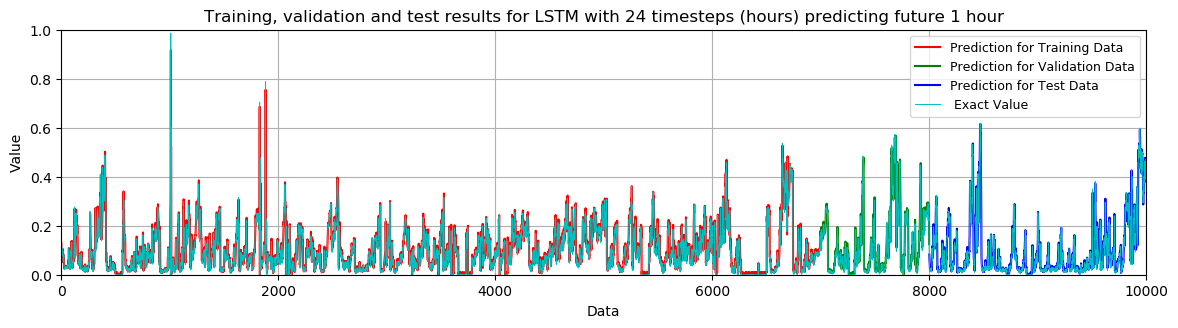

In [14]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for LSTM with 24 timesteps (hours) predicting future 1 hour')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

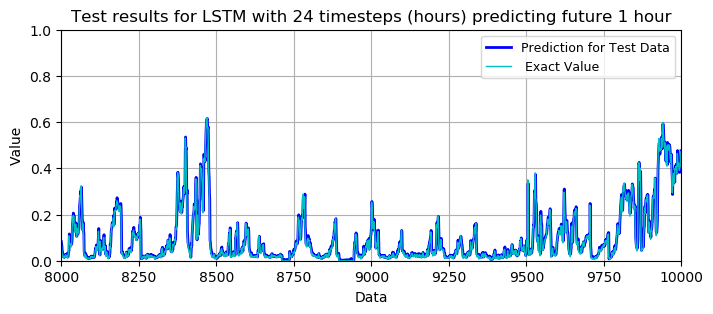

In [15]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for LSTM with 24 timesteps (hours) predicting future 1 hour')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()